Recommendation systems are among the most popular applications of data science. They are used to predict the Rating or Preference that a user would give to an item.

Almost every major company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on auto play, and Facebook uses it to recommend pages to like and people to follow.

In [1]:
import pandas as pd
import numpy as np

In [3]:
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")
print(credits.head())
print('---------------------------------------------------')
print(movies.head())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3",

In [4]:
print("Credits:",credits.shape)
print("Movies Dataframe:",movies.shape)

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


In [5]:
credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_merge = movies.merge(credits_column_renamed, on='id')
print(movies_merge.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [6]:
movies_cleaned = movies_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
print(movies_cleaned.head())
print(movies_cleaned.info())
print(movies_cleaned.head(1)['overview'])

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates

In [13]:
V = movies_cleaned['vote_count']
R = movies_cleaned['vote_average']
C = movies_cleaned['vote_average'].mean()
m = movies_cleaned['vote_count'].quantile(0.70)

movies_cleaned['weighted_average'] = (V/(V+m) * R) + (m/(m+V) * C)

Recommender Based on Weighted Average

Text(0, 0.5, 'Movie Title')

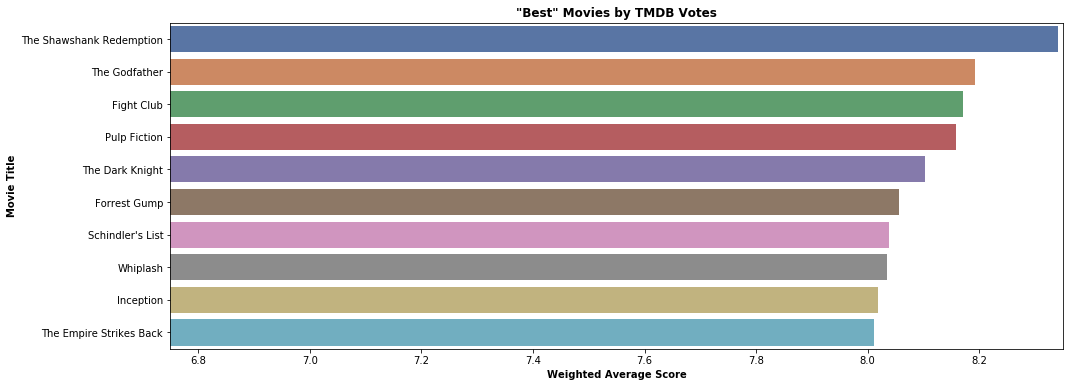

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

wavg = movies_cleaned.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=wavg['weighted_average'].head(10), y=wavg['original_title'].head(10), data=wavg, palette='deep')

plt.xlim(6.75, 8.35)
plt.title('"Best" Movies by TMDB Votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

# plt.savefig('best_movies.png')

Recommending Movies wrt Popularity

Text(0, 0.5, 'Movie Title')

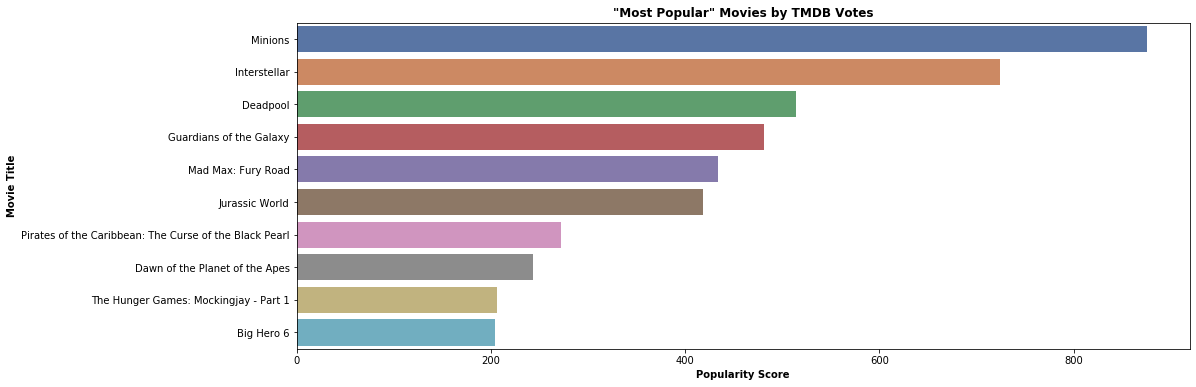

In [17]:
popular = movies_cleaned.sort_values('popularity', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=popular['popularity'].head(10), y=popular['original_title'].head(10), data=popular, palette='deep')

plt.title('"Most Popular" Movies by TMDB Votes', weight='bold')
plt.xlabel('Popularity Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

# plt.savefig('popular_movies.png')

Blending the above two methods in one method to recommend movies(50-50 split)

In [23]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
movies_scaled = min_max_scaler.fit_transform(movies_cleaned[['weighted_average', 'popularity']])
movies_norm = pd.DataFrame(movies_scaled, columns=['weighted_average', 'popularity'])
movies_norm.head()

movies_cleaned[['norm_weighted_average', 'norm_popularity']] = movies_norm

movies_cleaned['score'] = movies_cleaned['norm_weighted_average'] * 0.5 + movies_cleaned['norm_popularity'] * 0.5
movies_scored = movies_cleaned.sort_values(['score'], ascending=False)
movies_scored[['original_title', 'norm_weighted_average', 'norm_popularity', 'score']].head(20)

,original_title,norm_weighted_average,norm_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


Text(0, 0.5, 'Movie Title')

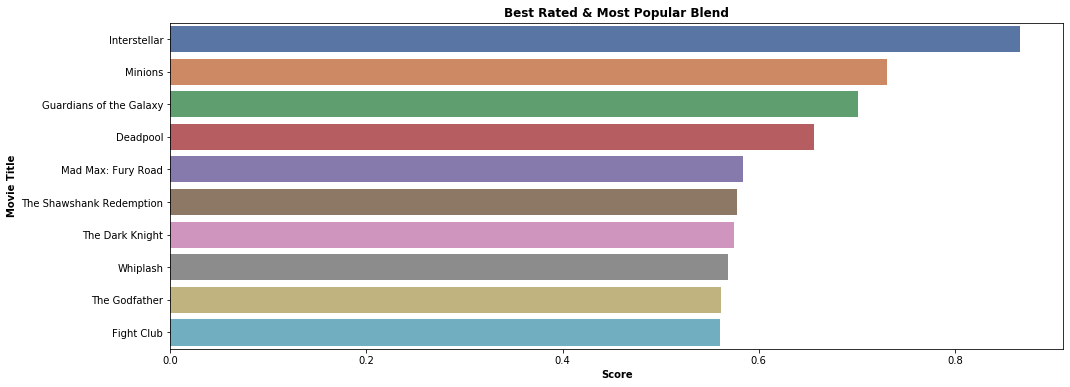

In [25]:
scored = movies_cleaned.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored['score'].head(10), y=scored['original_title'].head(10), data=scored, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [10]:
tfv_matrix = tfv.fit_transform(movies_cleaned['overview'].values.astype('U'))
# (df['Review'].values.astype('U'))
print(tfv_matrix)
print(tfv_matrix.shape)

  (0, 148)	0.3091311403250014
  (0, 1670)	0.2781519888709605
  (0, 431)	0.2108476222845202
  (0, 7056)	0.26867652924731417
  (0, 6448)	0.25667782792456906
  (0, 3582)	0.21788257757629861
  (0, 9394)	0.24144219475319859
  (0, 5907)	0.17992707015426695
  (0, 9718)	0.24435395917916744
  (0, 6544)	0.2959108637414298
  (0, 5972)	0.2747332388389473
  (0, 2634)	0.2818968058308858
  (0, 5658)	0.2610479764815685
  (0, 1514)	0.20118856027389756
  (0, 147)	0.3091311403250014
  (1, 1810)	0.36793229072333994
  (1, 7160)	0.3031029042939378
  (1, 2916)	0.30082125582474917
  (1, 9610)	0.3355175975086389
  (1, 2848)	0.21556897928560054
  (1, 2872)	0.3232482593626707
  (1, 4205)	0.30803003793564465
  (1, 5263)	0.1333016217342793
  (1, 1806)	0.2104623271234315
  (1, 2318)	0.21892404835497967
  :	:
  (4802, 671)	0.15980375315748296
  (4802, 2360)	0.15010502652571864
  (4802, 677)	0.1348896650905315
  (4802, 3736)	0.14859055527694667
  (4802, 3480)	0.14340155530934393
  (4802, 1252)	0.1517317799962251
  (4

In [11]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
print(sig[0])

[0.76163447 0.76159416 0.76159416 ... 0.76159416 0.76159416 0.76159416]


In [26]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned.index, index=movies_cleaned['original_title']).drop_duplicates()
print(indices)
print(indices['Newlyweds'])
print(sig[4799])
print(list(enumerate(sig[indices['Newlyweds']])))
print(sorted(list(enumerate(sig[indices['Newlyweds']])), key=lambda x: x[1], reverse=True))

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64
4799
[0.76159416 0.76159416 0.76159438 ... 0.76159432 0.76159416 0.76159478]
[(0, 0.7615941559557649), (1, 0.7615941559557649), (2, 0.7615943791409256), (3, 0.7615945563848503), (4, 0.7615945778937508), (5, 0.7615943267807571), (6, 0.7615948189777592), (7, 0.7615943469533287), (8, 0.761594390313389), (9, 0.7615946882047968), (10, 0.7615941559557649), (11, 0.7615941559557649), (12, 0.7615941559557649), (13, 0.7615941

In [27]:
def give_recomendations(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_cleaned['original_title'].iloc[movie_indices]

In [28]:
print(give_recomendations('Avatar'))

1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
942                 The Book of Life
Name: original_title, dtype: object


In [29]:
print(give_recomendations('Newlyweds'))

616                       Ted 2
2689         Our Family Wedding
869          You, Me and Dupree
3969           Something Wicked
1576                 Bride Wars
2290               Just Married
1032      America's Sweethearts
3145                      Amour
2531     Why Did I Get Married?
504     The Secret Life of Pets
Name: original_title, dtype: object


References:
    1. https://morioh.com/p/2fea5a49b62d
    2. https://thecleverprogrammer.com/2020/05/20/data-science-project-movie-recommendation-system/